In [1]:
import mne
import pandas as pd
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('TKAgg')
from mne.time_frequency import tfr_morlet
from sleep_utilities import art_clean

os.chdir('C:/Users/Admin/Desktop/')

In [13]:
# import and clean data

InputPaths = './陈曦/2022103126300001/2022103126300001.txt'
raw = np.loadtxt(InputPaths, dtype = np.floating, delimiter = ',') # 读取文件
clean_raw = art_clean(raw, slice_interval = 30, l_freq = 0.1, h_freq = 40)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [14]:
print(len(raw) / 250 / 60 / 60) # 四个多小时的数据

4.699166666666667


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

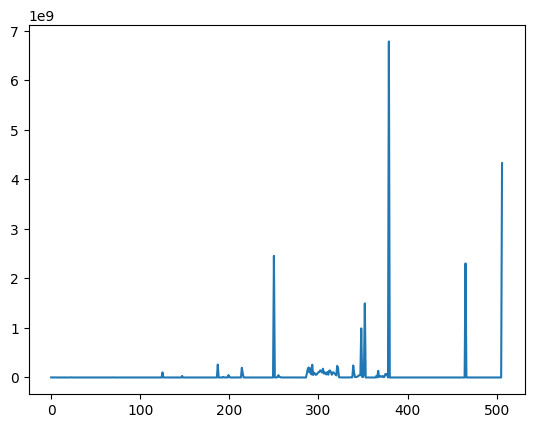

In [17]:
# 复用冯博代码

clean_raw = np.array(clean_raw)
from mne.time_frequency import psd_array_multitaper
from scipy.integrate import simps
hz_list = [2, 3, 4, 12, 16]
num_hz = len(hz_list)
len_slice = 30 * 250  # sec * samplerate
num_slice = int(len(clean_raw) / len_slice)
max_len = num_slice * len_slice
sliced_data = clean_raw.reshape(num_slice, len_slice)

PSD_table = np.zeros(shape=(num_slice, num_hz))
for ii in range(num_slice):
    current_data = sliced_data[ii, :]
    psd, freqs = psd_array_multitaper(current_data, 250, adaptive=True,
                                      normalization='full', verbose=0)
    freq_res = freqs[1] - freqs[0]
    for jj in range(num_hz):
        hz = hz_list[jj]
        idx_band = np.logical_and(freqs >= hz-0.5, freqs <= hz+0.5)
        band_power = simps(psd[idx_band], dx=freq_res)  # simps抛物线近似
        PSD_table[ii, jj] = band_power
plt.plot(PSD_table[:,4])

In [ ]:
# 自己代码

